In [2]:
# Load modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import KaplanMeierFitter

In [3]:
# Load Major Salivary Tumor Listing data
salivary_df = pd.read_csv("SEEROutput.csv",low_memory=False)

In [4]:
# Look at data header
display(salivary_df.head())
display(salivary_df.info())
display(salivary_df.columns)

,Patient ID,Age recode with <1 year olds,Sex,Year of diagnosis,PRCDA 2020,"Race recode (W, B, AI, API)","Origin recode NHIA (Hispanic, Non-Hisp)",Site recode ICD-O-3/WHO 2008,Behavior code ICD-O-3,Primary Site - labeled,...,"Race recode (White, Black, Other)",Age recode with <1 year olds and 90+,Age recode with single ages and 85+,Age recode with single ages and 90+,Race/ethnicity,Year of follow-up recode,Year of death recode,Marital status at diagnosis,Median household income inflation adj to 2022,Rural-Urban Continuum Code
0,1154,75-79 years,Male,2016,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Salivary Gland,Malignant,C07.9-Parotid gland,...,White,75-79 years,79 years,79 years,White,2017,2017,Married (including common law),"$120,000+",Counties in metropolitan areas ge 1 million pop
1,2966,85+ years,Male,2002,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Salivary Gland,Malignant,C07.9-Parotid gland,...,White,85-89 years,85+ years,89 years,White,2009,2009,Married (including common law),"$110,000 - $119,999",Counties in metropolitan areas ge 1 million pop
2,3425,70-74 years,Male,2006,Not PRCDA,Asian or Pacific Islander,Non-Spanish-Hispanic-Latino,NHL - Extranodal,Malignant,C07.9-Parotid gland,...,"Other (American Indian/AK Native, Asian/Pacifi...",70-74 years,72 years,72 years,Chinese,2021,Alive at last contact,Married (including common law),"$110,000 - $119,999",Counties in metropolitan areas ge 1 million pop
3,4395,65-69 years,Female,2019,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Salivary Gland,Malignant,C07.9-Parotid gland,...,White,65-69 years,65 years,65 years,White,2021,Alive at last contact,Divorced,"$120,000+",Counties in metropolitan areas ge 1 million pop
4,5623,55-59 years,Female,2019,Not PRCDA,Asian or Pacific Islander,Non-Spanish-Hispanic-Latino,Salivary Gland,Malignant,C07.9-Parotid gland,...,"Other (American Indian/AK Native, Asian/Pacifi...",55-59 years,56 years,56 years,Filipino,2021,Alive at last contact,Married (including common law),"$120,000+",Counties in metropolitan areas ge 1 million pop


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28030 entries, 0 to 28029
Data columns (total 64 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Patient ID                                                 28030 non-null  int64 
 1   Age recode with <1 year olds                               28030 non-null  object
 2   Sex                                                        28030 non-null  object
 3   Year of diagnosis                                          28030 non-null  int64 
 4   PRCDA 2020                                                 28030 non-null  object
 5   Race recode (W, B, AI, API)                                28030 non-null  object
 6   Origin recode NHIA (Hispanic, Non-Hisp)                    28030 non-null  object
 7   Site recode ICD-O-3/WHO 2008                               28030 non-null  object
 8   Behavior code IC

None

Index(['Patient ID', 'Age recode with <1 year olds', 'Sex',
       'Year of diagnosis', 'PRCDA 2020', 'Race recode (W, B, AI, API)',
       'Origin recode NHIA (Hispanic, Non-Hisp)',
       'Site recode ICD-O-3/WHO 2008', 'Behavior code ICD-O-3',
       'Primary Site - labeled', 'Primary Site', 'Histologic Type ICD-O-3',
       'Grade Recode (thru 2017)', 'Derived Summary Grade 2018 (2018+)',
       'Grade Clinical (2018+)', 'Grade Pathological (2018+)', 'Laterality',
       'Diagnostic Confirmation', 'ICD-O-3 Hist/behav',
       'ICD-O-3 Hist/behav, malignant', 'Histology recode - broad groupings',
       'Site recode ICD-O-3/WHO 2008 (for SIRs)',
       'Combined Summary Stage (2004+)', 'Summary stage 2000 (1998-2017)',
       'SEER Combined Summary Stage 2000 (2004-2017)',
       'SEER historic stage A (1973-2015)', 'RX Summ--Surg Prim Site (1998+)',
       'RX Summ--Scope Reg LN Sur (2003+)',
       'RX Summ--Surg Oth Reg/Dis (2003+)', 'RX Summ--Surg/Rad Seq',
       'Reason no can

# SEER Salivary Tumor Data Missing Values
Although it appears that there are minimal null values, this is likely due to the way that data have been logged. For each relevant column, we will need to address missing values individually. They may be logged as, for example, 'XX' or '99'.


['75-79 years' '85+ years' '70-74 years' '65-69 years' '55-59 years'
 '25-29 years' '45-49 years' '50-54 years' '60-64 years' '80-84 years'
 '35-39 years' '40-44 years' '20-24 years' '10-14 years' '30-34 years'
 '15-19 years' '01-04 years' '05-09 years' '00 years']
['White' 'Asian or Pacific Islander' 'Black'
 'American Indian/Alaska Native' 'Unknown']
['Male' 'Female']


,Age recode with <1 year olds,"Race recode (W, B, AI, API)",Sex
count,28030,28030,28030
unique,19,5,2
top,70-74,White,Male
freq,3158,22855,15765


/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_64522/3650341106.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  age_countplot.set_xticklabels(age_countplot.get_xticklabels(), rotation=90)
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_64522/3650341106.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  age_countplot.set_xticklabels(age_countplot.get_xticklabels(), rotation=90)


Text(0, 0.5, 'Count')

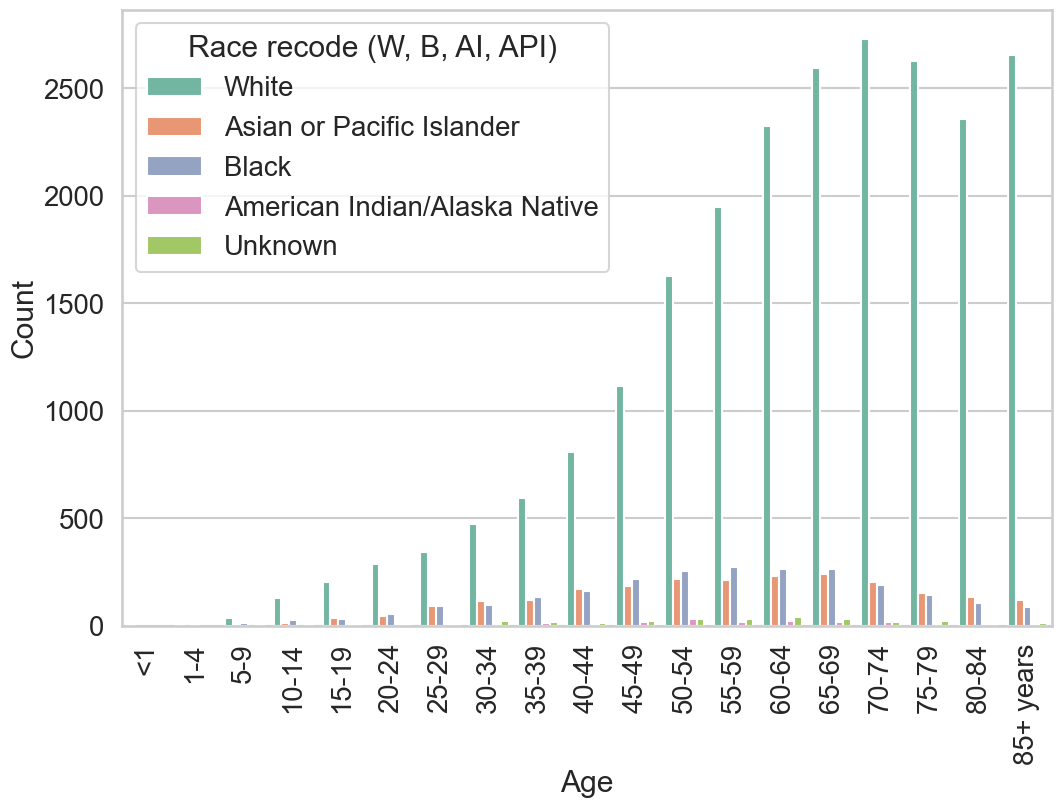

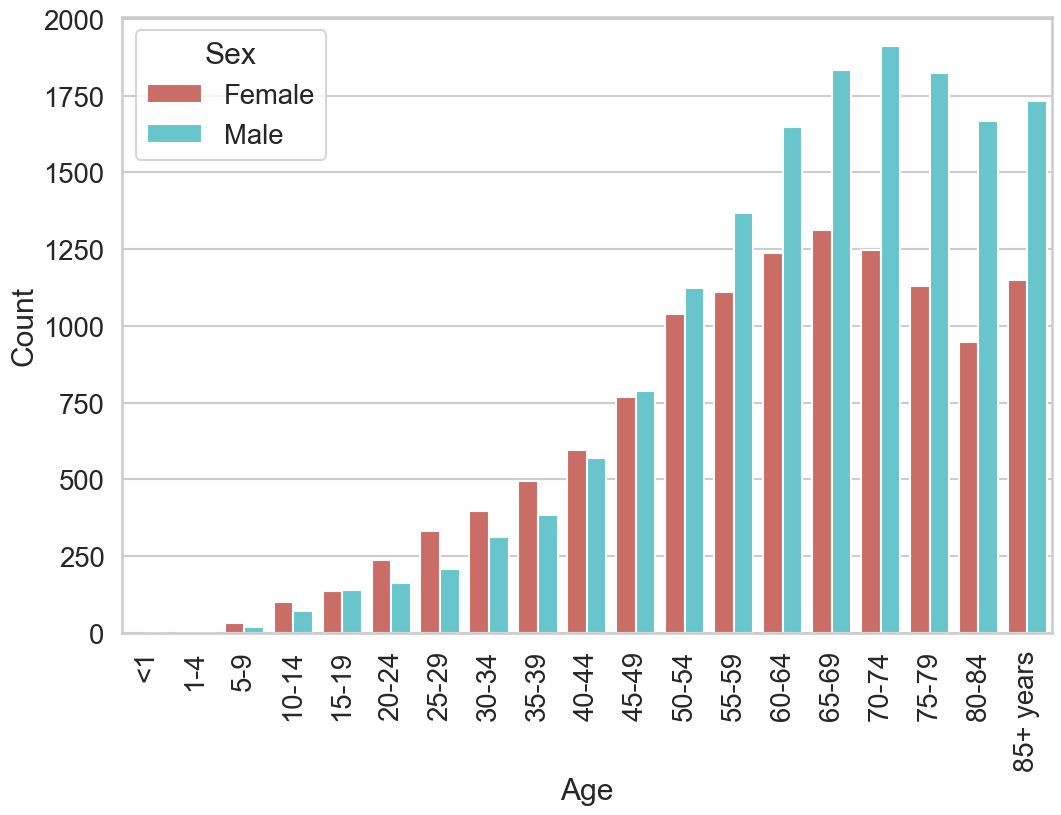

In [5]:

# Select relevant columns for demographic analysis
demographic_columns = ['Age recode with <1 year olds', 'Race recode (W, B, AI, API)', 'Sex']

# Evaluate each column for missing values
print(salivary_df[demographic_columns[0]].unique())
print(salivary_df[demographic_columns[1]].unique())
print(salivary_df[demographic_columns[2]].unique())

# Original age categories and the desired new labels
age_mapping = {
    '00 years': '<1',
    '01-04 years': '1-4',
    '05-09 years': '5-9',
    '10-14 years': '10-14',
    '15-19 years': '15-19',
    '20-24 years': '20-24',
    '25-29 years': '25-29',
    '30-34 years': '30-34',
    '35-39 years': '35-39',
    '40-44 years': '40-44',
    '45-49 years': '45-49',
    '50-54 years': '50-54',
    '55-59 years': '55-59',
    '60-64 years': '60-64',
    '65-69 years': '65-69',
    '70-74 years': '70-74',
    '75-79 years': '75-79',
    '80-84 years': '80-84',
    '85+ years': '85+ years'
}

# Apply the mapping to the Age recode column
salivary_df['Age recode with <1 year olds'] = salivary_df['Age recode with <1 year olds'].replace(age_mapping)

# Create an ordered list of the new labels
age_order = list(age_mapping.values())

# Convert the Age recode column to a categorical type with ordered categories
salivary_df['Age recode with <1 year olds'] = pd.Categorical(
    salivary_df['Age recode with <1 year olds'], categories=age_order, ordered=True
)

# Sex order
sex_order = ['Female','Male']

# Convert Sex column to reflect new order
salivary_df['Sex'] = pd.Categorical(
    salivary_df['Sex'], categories=sex_order, ordered=True
)


# Create a summary for age, sex, and race
demographic_summary = salivary_df[demographic_columns].describe(include='all')

# Display the summary
display(demographic_summary)

# Plot - countplot
sns.set_context('talk',font_scale=1.2)
sns.set_palette('Set2')
plt.figure(figsize=(12, 8))
age_countplot = sns.countplot(
    data=salivary_df,
    x='Age recode with <1 year olds',
    hue='Race recode (W, B, AI, API)',
    order=age_order,
)
age_countplot.set_xticklabels(age_countplot.get_xticklabels(), rotation=90)
age_countplot.set_xlabel('Age')
age_countplot.set_ylabel('Count')

plt.figure(figsize=(12, 8))
age_countplot = sns.countplot(
    data=salivary_df,
    x='Age recode with <1 year olds',
    hue='Sex',
    order=age_order,
    palette='hls'
)
age_countplot.set_xticklabels(age_countplot.get_xticklabels(), rotation=90)
age_countplot.set_xlabel('Age')
age_countplot.set_ylabel('Count')

# Age Recode with 85+ and Other Categorical Adjustments

In [33]:
# Select relevant columns for demographic analysis
age_colname = 'Age recode with single ages and 85+'
race_colname = 'Race recode (W, B, AI, API)'
sex_colname = 'Sex'
ses_colname = 'Median household income inflation adj to 2022'

demographic_columns = [age_colname,race_colname,sex_colname, ses_colname]
# Organize age column as a categorical with numerical order
numerical_years = salivary_df[age_colname].str.extract('(\d+)')

# Get the sorted unique ages based on the numerical values
sorted_ages = salivary_df.loc[numerical_years.sort_values(by=0).index, age_colname].unique()

# Convert the 'age_colname' column to categorical with sorted order
salivary_df[age_colname] = pd.Categorical(salivary_df[age_colname], 
                                          categories=sorted_ages, ordered=True)
# Remove the "years" string from the age column
salivary_df[age_colname] = salivary_df[age_colname].str.replace('years', '').str.strip()


# Sex order
sex_order = ['Female','Male']

# Convert Sex column to reflect new order
salivary_df[sex_colname] = pd.Categorical(
    salivary_df[sex_colname], categories=sex_order, ordered=True
)

# Race order
race_order = sorted(salivary_df[race_colname].unique())

# Convert race column to reflect new world order
salivary_df[race_colname] = pd.Categorical(
    salivary_df[race_colname], categories=race_order, ordered=True
)

display(salivary_df[age_colname].unique)

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_64522/3819680032.py:9: SyntaxWarning: invalid escape sequence '\d'
  numerical_years = salivary_df[age_colname].str.extract('(\d+)')


<bound method Series.unique of 0         79
1        85+
2         72
3         65
4         56
        ... 
28025     64
28026     74
28027     60
28028    85+
28029     65
Name: Age recode with single ages and 85+, Length: 28030, dtype: object>

,Age recode with single ages and 85+,"Race recode (W, B, AI, API)",Sex,Median household income inflation adj to 2022
count,28030,28030,28030,28030
unique,85,5,2,17
top,85+,White,Male,"$70,000 - $74,999"
freq,2884,22855,15765,4006


/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_64522/4182152966.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  age_countplot.set_xticklabels(age_countplot.get_xticklabels(), rotation=90)
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_64522/4182152966.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  age_countplot.set_xticklabels(age_countplot.get_xticklabels(), rotation=90)


Text(0, 0.5, 'Count')

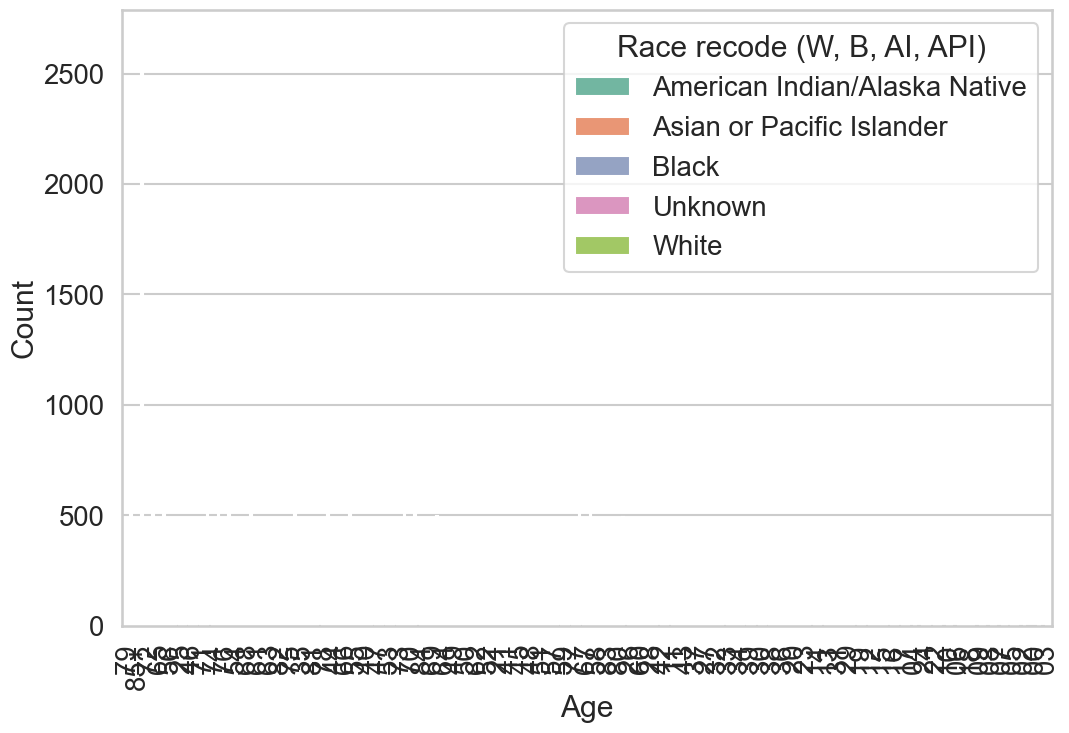

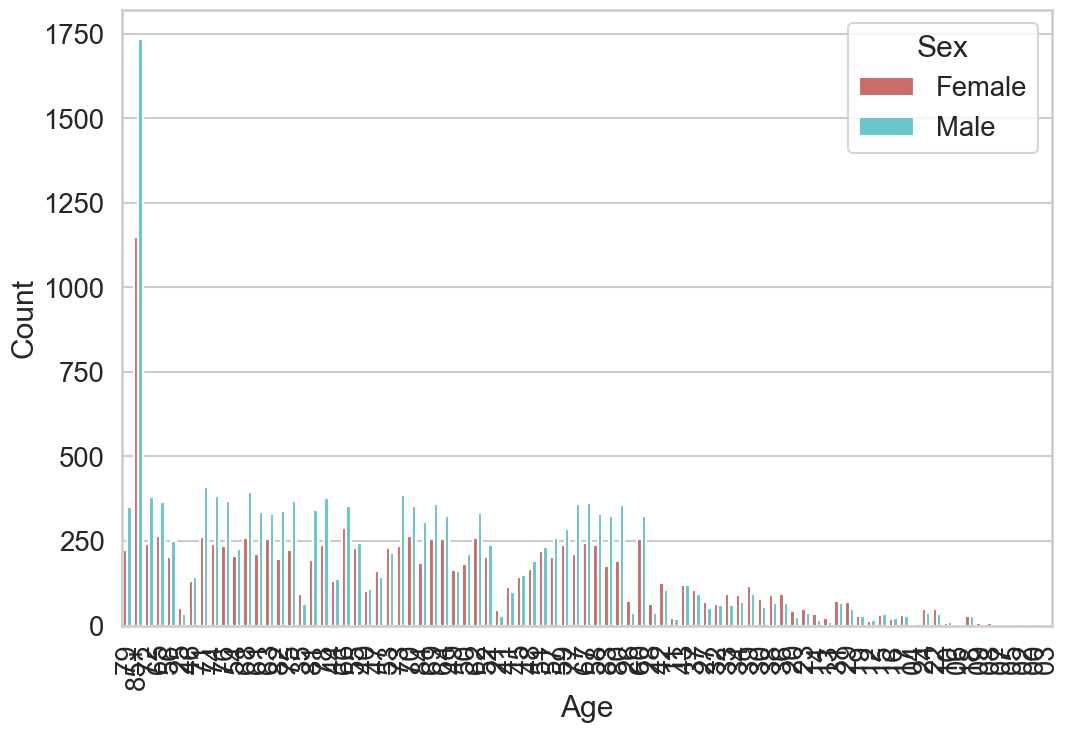

In [34]:

# Create a summary for age, sex, and race
demographic_summary = salivary_df[demographic_columns].describe(include='all')

# Display the summary
display(demographic_summary)

# Plot - countplot
sns.set_context('talk',font_scale=1.2)
sns.set_palette('Set2')
plt.figure(figsize=(12, 8))
age_countplot = sns.countplot(
    data=salivary_df,
    x=age_colname,
    hue=race_colname,
)
age_countplot.set_xticklabels(age_countplot.get_xticklabels(), rotation=90)
age_countplot.set_xlabel('Age')
age_countplot.set_ylabel('Count')

plt.figure(figsize=(12, 8))
age_countplot = sns.countplot(
    data=salivary_df,
    x=age_colname,
    hue=sex_colname,
    palette='hls'
)
age_countplot.set_xticklabels(age_countplot.get_xticklabels(), rotation=90)
age_countplot.set_xlabel('Age')
age_countplot.set_ylabel('Count')

In [6]:
# Select relevant columns for clinical characteristics analysis
clinical_columns = [
    'Site recode ICD-O-3/WHO 2008',
    'Histologic Type ICD-O-3',
    'Histology recode - broad groupings',
    'Combined Summary Stage (2004+)',
    'Summary stage 2000 (1998-2017)',
    'RX Summ--Surg Prim Site (1998+)',
    'Radiation recode',
    'Chemotherapy recode (yes, no/unk)'
]

# Creating a summary for clinical characteristics
clinical_summary = salivary_df[clinical_columns].describe(include='all')

# Display the summary
display(clinical_summary)

clinical_summary['Histologic Type ICD-O-3'].value_counts()


,Site recode ICD-O-3/WHO 2008,Histologic Type ICD-O-3,Histology recode - broad groupings,Combined Summary Stage (2004+),Summary stage 2000 (1998-2017),RX Summ--Surg Prim Site (1998+),Radiation recode,"Chemotherapy recode (yes, no/unk)"
count,28030,28030.000000,28030,28030,28030,28030.000000,28030,28030
unique,6,NaN,38,6,5,NaN,8,2
top,Salivary Gland,NaN,8050-8089: squamous cell neoplasms,Localized,Localized,NaN,None/Unknown,No/Unknown
freq,24029,NaN,5163,11120,10284,NaN,13469,23439
mean,NaN,8505.047271,NaN,NaN,NaN,30.352301,NaN,NaN
std,NaN,536.707302,NaN,NaN,NaN,19.614591,NaN,NaN
min,NaN,8000.000000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,8071.000000,NaN,NaN,NaN,27.000000,NaN,NaN
50%,NaN,8430.000000,NaN,NaN,NaN,33.000000,NaN,NaN
75%,NaN,8550.000000,NaN,NaN,NaN,41.000000,NaN,NaN


Histologic Type ICD-O-3
28030.000000    1
8505.047271     1
536.707302      1
8000.000000     1
8071.000000     1
8430.000000     1
8550.000000     1
9971.000000     1
Name: count, dtype: int64

In [109]:
salivary_df['event_occurred'] = salivary_df['SEER other cause of death classification'].apply(
    lambda x: 1 if x == 'Alive or dead due to cancer'
# else 2 if x == 'Dead (missing/unknown COD)'
else 0)

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the data into the model
kmf.fit(durations=salivary_df['Survival months'], event_observed=salivary_df['event_occurred'])

# Plot the Kaplan-Meier survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


TypeError: Wrong dtype 'object'.

In [108]:
print(salivary_df['SEER other cause of death classification'].unique())

print(salivary_df['event_occurred'].unique())

salivary_df['Survival months']

['Dead (attributable to causes other than this cancer dx)'
 'Alive or dead due to cancer' 'Dead (missing/unknown COD)'
 'N/A not seq 0-59']


KeyError: 'event_occurred'